In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import validation_curve

# ABRIMOS EL DATA FRAME

In [57]:
df = pd.read_csv('constituents-financials.csv')
df

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


# ANALISIS EDA

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            505 non-null    object 
 1   Sector          505 non-null    object 
 2   Price           505 non-null    float64
 3   Price/Earnings  503 non-null    float64
 4   Dividend Yield  505 non-null    float64
 5   Earnings/Share  505 non-null    float64
 6   52 Week Low     505 non-null    float64
 7   52 Week High    505 non-null    float64
 8   Market Cap      505 non-null    float64
 9   EBITDA          505 non-null    float64
 10  Price/Sales     505 non-null    float64
 11  Price/Book      497 non-null    float64
dtypes: float64(10), object(2)
memory usage: 47.5+ KB


In [59]:
df.head()

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62


In [60]:
df.tail()

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.86,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.85,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.17,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.43,1.067068e+10,0.000000e+00,3.794579,1.42
504,Zoetis,Health Care,71.51,32.80,0.682372,1.65,80.13,52.00,3.599111e+10,1.734000e+09,9.280896,18.09


In [61]:
df.isnull().sum()

Name              0
Sector            0
Price             0
Price/Earnings    2
Dividend Yield    0
Earnings/Share    0
52 Week Low       0
52 Week High      0
Market Cap        0
EBITDA            0
Price/Sales       0
Price/Book        8
dtype: int64

In [62]:
filas_nulas = df[df.isnull().any(axis =  1)]
filas_nulas

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
55,Arconic Inc,Industrials,24.45,20.21,0.956175,-0.21,31.17,21.755,1.212330e+10,1.517000e+09,0.942148,NaN
199,Foot Locker Inc,Consumer Discretionary,45.88,9.50,2.582795,4.91,77.86,28.420,5.819080e+09,9.570000e+08,1.036295,NaN
225,HCA Holdings,Health Care,95.97,14.07,1.422764,5.94,106.84,71.180,3.444905e+10,8.202000e+09,0.725192,NaN
292,Marathon Oil Corp.,Energy,15.68,-32.00,1.224740,-2.65,19.52,10.550,1.387501e+10,2.266000e+09,4.657876,NaN
346,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.09,57.200,5.346769e+10,5.205000e+09,6.044895,NaN
358,PepsiCo Inc.,Consumer Staples,110.15,21.51,2.837004,4.36,122.51,104.770,1.610000e+11,1.284300e+10,3.670506,NaN
360,Perrigo,Health Care,84.44,NaN,0.731261,-28.01,95.93,63.680,1.232638e+10,0.000000e+00,3.385007,2.03
430,"Tapestry, Inc.",Consumer Discretionary,48.85,NaN,0.000000,2.09,50.71,36.690,1.424720e+10,0.000000e+00,4.078549,4.35
450,TransDigm Group,Industrials,283.00,23.76,0.000000,7.92,321.38,203.720,1.524120e+10,1.635916e+09,4.268832,NaN
460,Union Pacific,Industrials,124.86,22.06,2.062655,13.52,143.05,101.060,1.020000e+11,1.016900e+10,4.860507,NaN


In [74]:
df_clean = df.dropna()
df_clean

,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book
0,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.390000e+11,9.048000e+09,4.390271,11.34
1,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35
2,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.020000e+11,5.744000e+09,3.740480,3.19
3,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.810000e+11,1.031000e+10,6.291571,26.14
4,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62
...,...,...,...,...,...,...,...,...,...,...,...,...
500,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31
501,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08
502,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39
503,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42


In [ ]:
##df_clean.rename(columns={
    ##'52 Week Low': 'Week Wigh 52',
    ##'52 Week High': 'Week Low 52'
##},inplace=True)

In [65]:
##df_clean.rename(columns={
    ##'52 Week Low': 'Week Wigh 52',
    ##'52 Week High': 'Week Low 52'
##}, inplace=True)

C:\Users\Pavel\AppData\Local\Temp\ipykernel_26776\619490311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.rename(columns={


In [75]:
df_clean.duplicated().sum()

0

In [76]:
#ver si se repite alguna empresa

empresas = df_clean['Name'].nunique()
empresas

495

In [77]:
sectores = df_clean['Sector'].nunique()
sectores

11

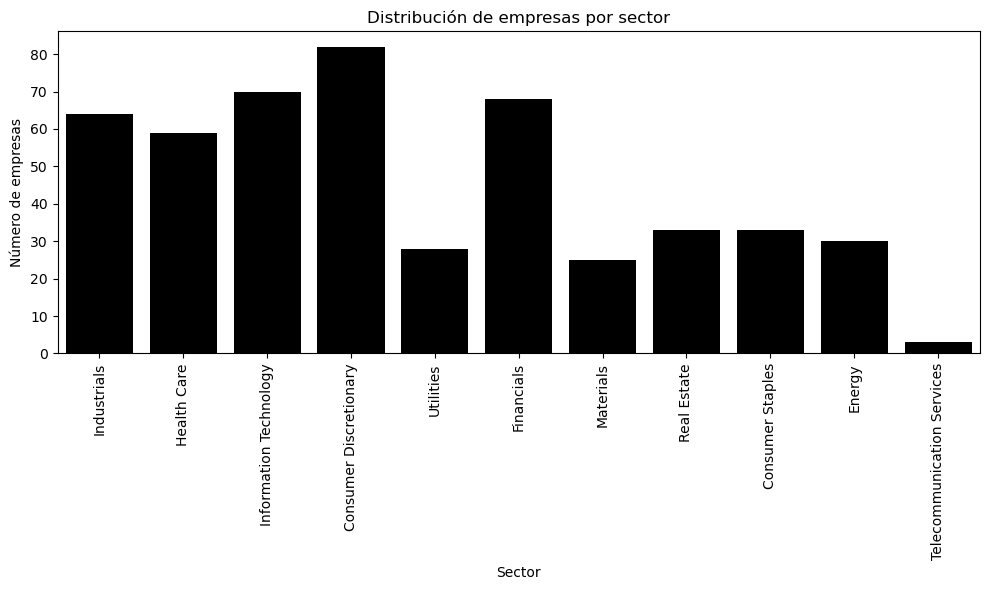

In [78]:
#Exploración de la distribución de sectores (gráfico de barras)

plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='Sector', color='black')
plt.xticks(rotation=90)
plt.title('Distribución de empresas por sector')
plt.xlabel('Sector')
plt.ylabel('Número de empresas')
plt.tight_layout()
plt.show()

In [79]:
#Peso de empresas por sector (en porcentaje)

proporciones_sectores = df_clean['Sector'].value_counts(normalize=True) * 100
print("\nProporción de empresas por sector (%):")
proporciones_sectores


Proporción de empresas por sector (%):


Sector
Consumer Discretionary        16.565657
Information Technology        14.141414
Financials                    13.737374
Industrials                   12.929293
Health Care                   11.919192
Real Estate                    6.666667
Consumer Staples               6.666667
Energy                         6.060606
Utilities                      5.656566
Materials                      5.050505
Telecommunication Services     0.606061
Name: proportion, dtype: float64

In [81]:
numeric_columns = ['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']

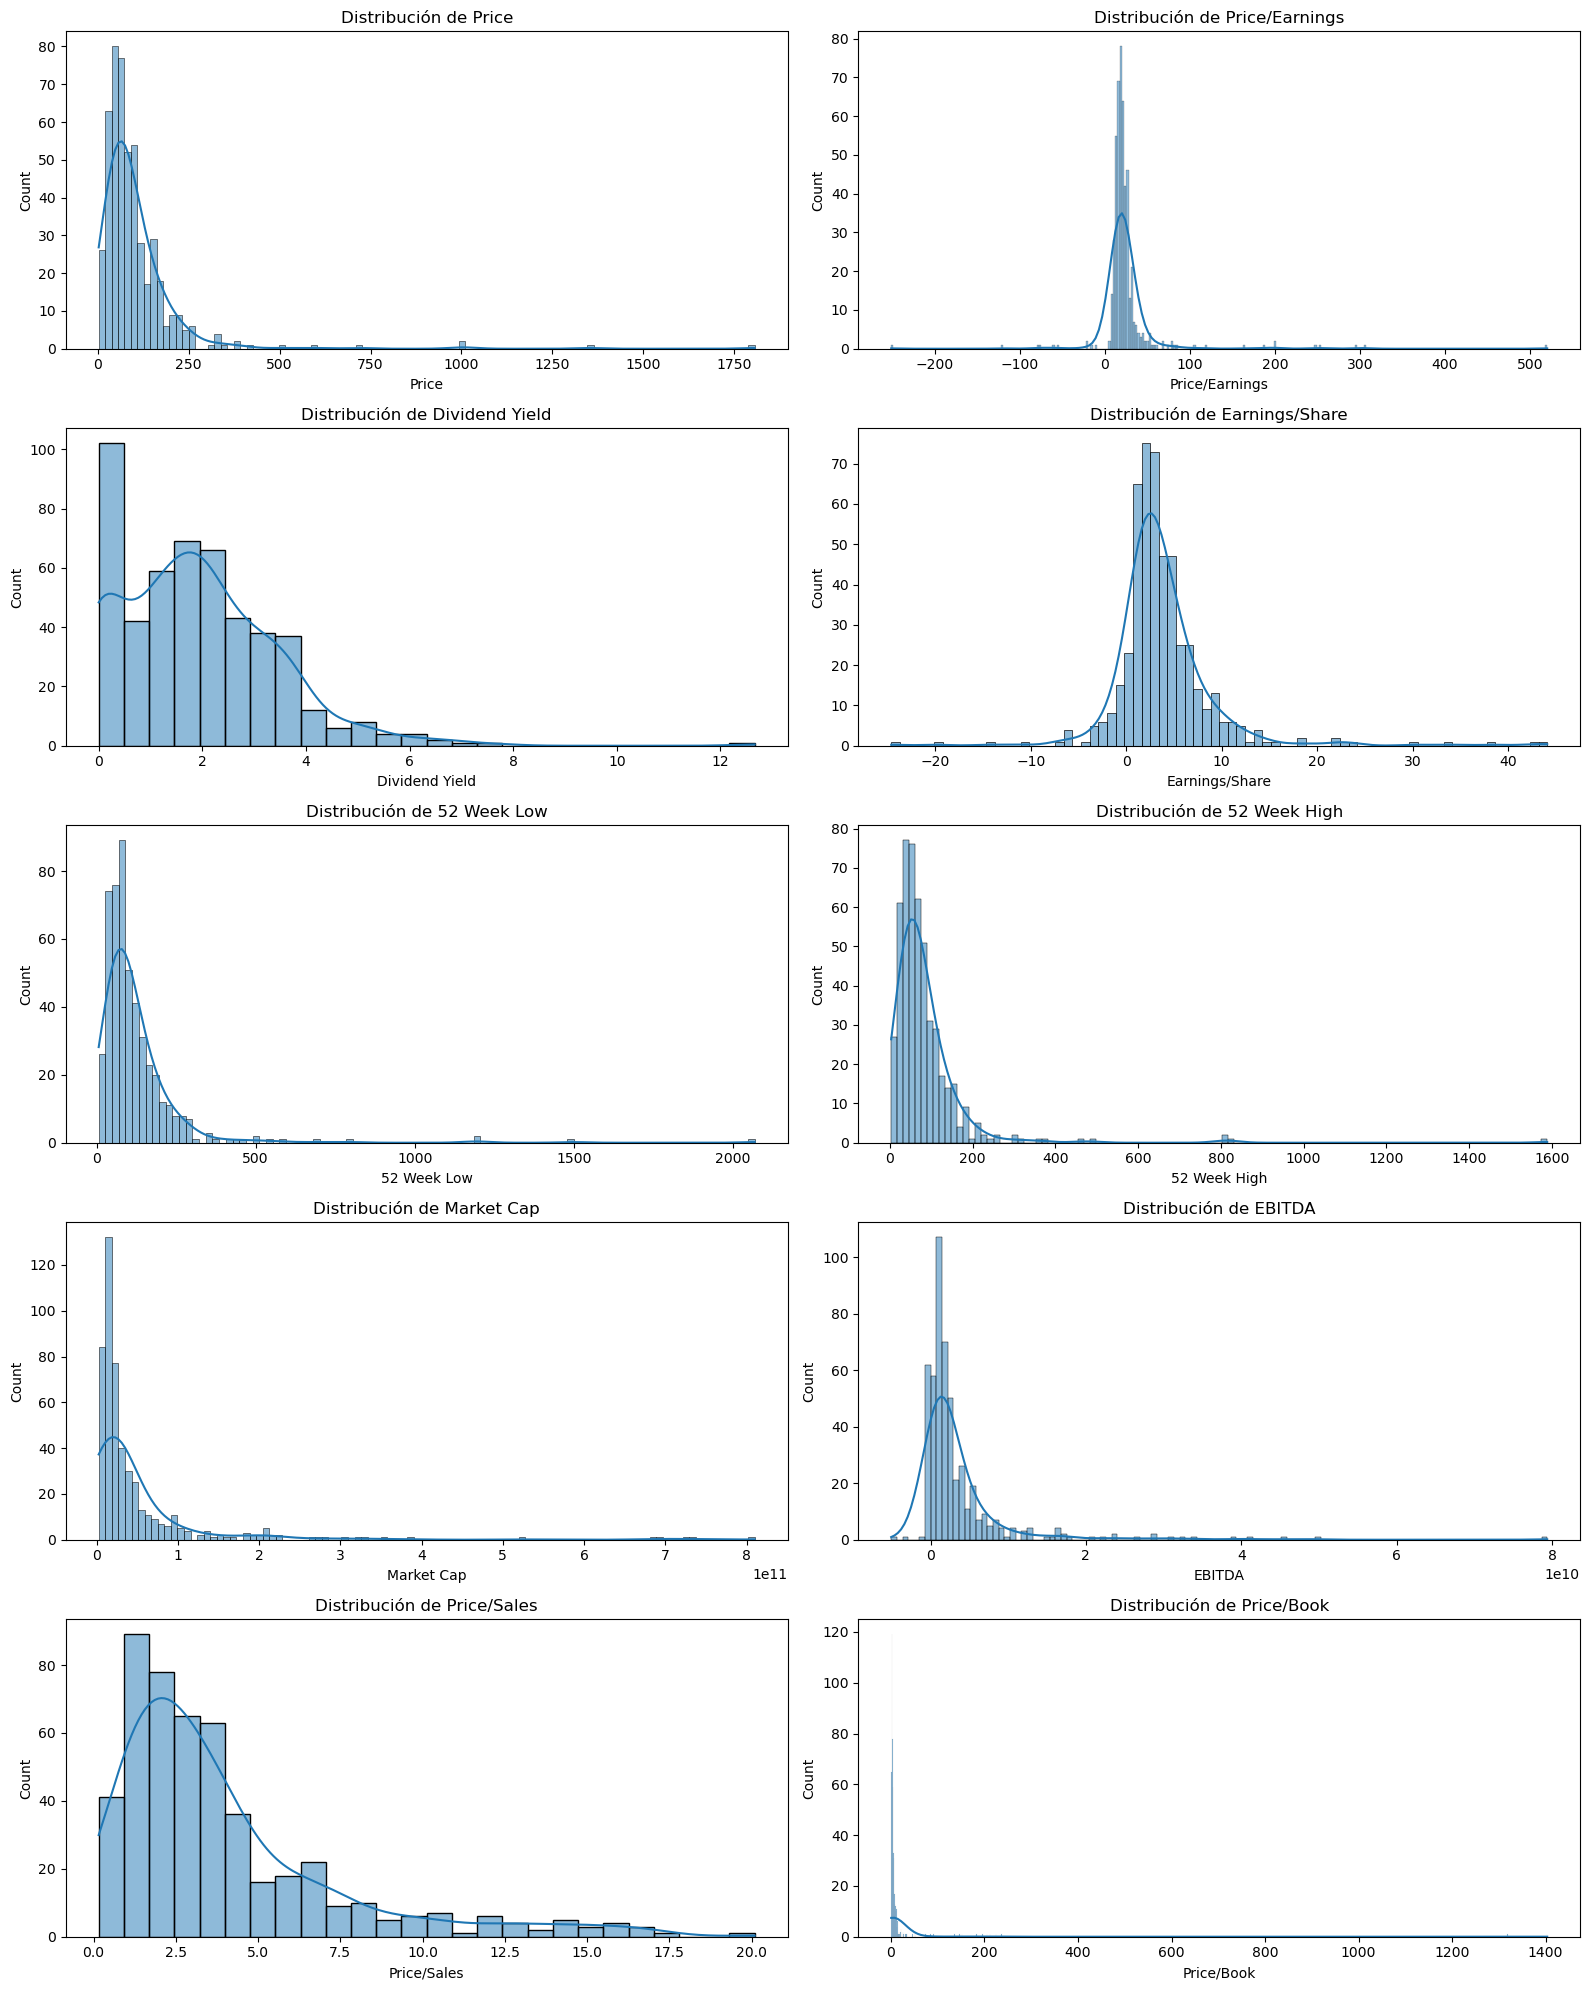

In [82]:
# Crear histogramas para cada variable numérica
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 2, i+1)
    sns.histplot(df_clean[col], kde=True)
    plt.title(f'Distribución de {col}')
plt.tight_layout()
plt.show()

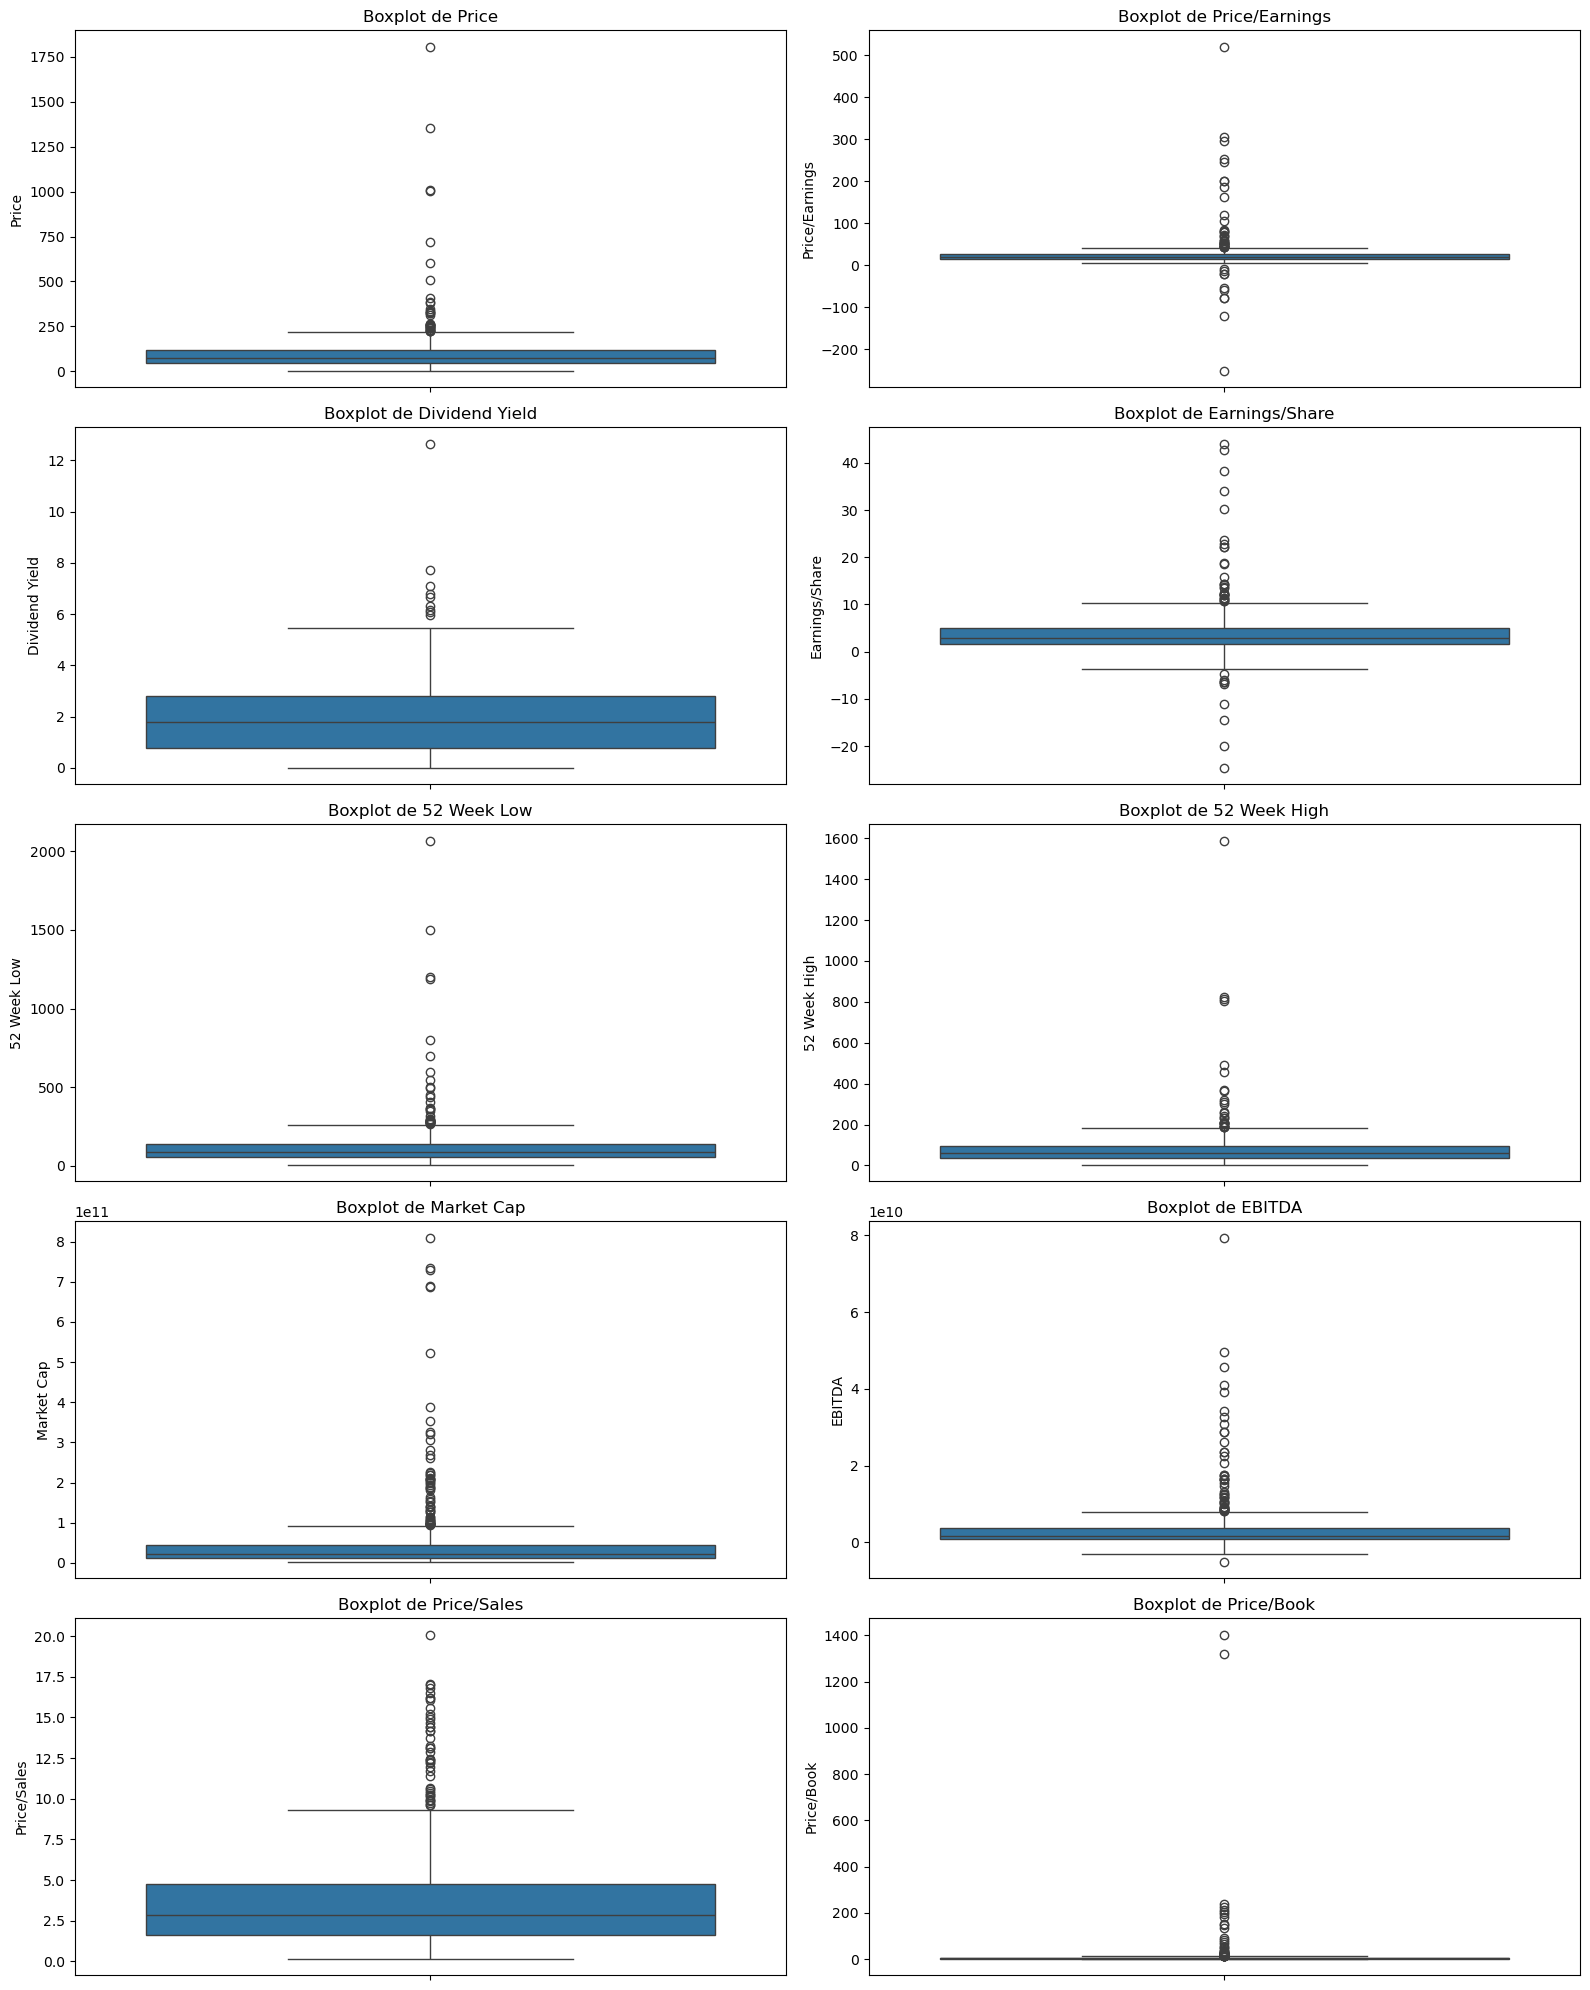

In [83]:
# Crear boxplots para cada variable numérica
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 2, i+1)
    sns.boxplot(y=df_clean[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

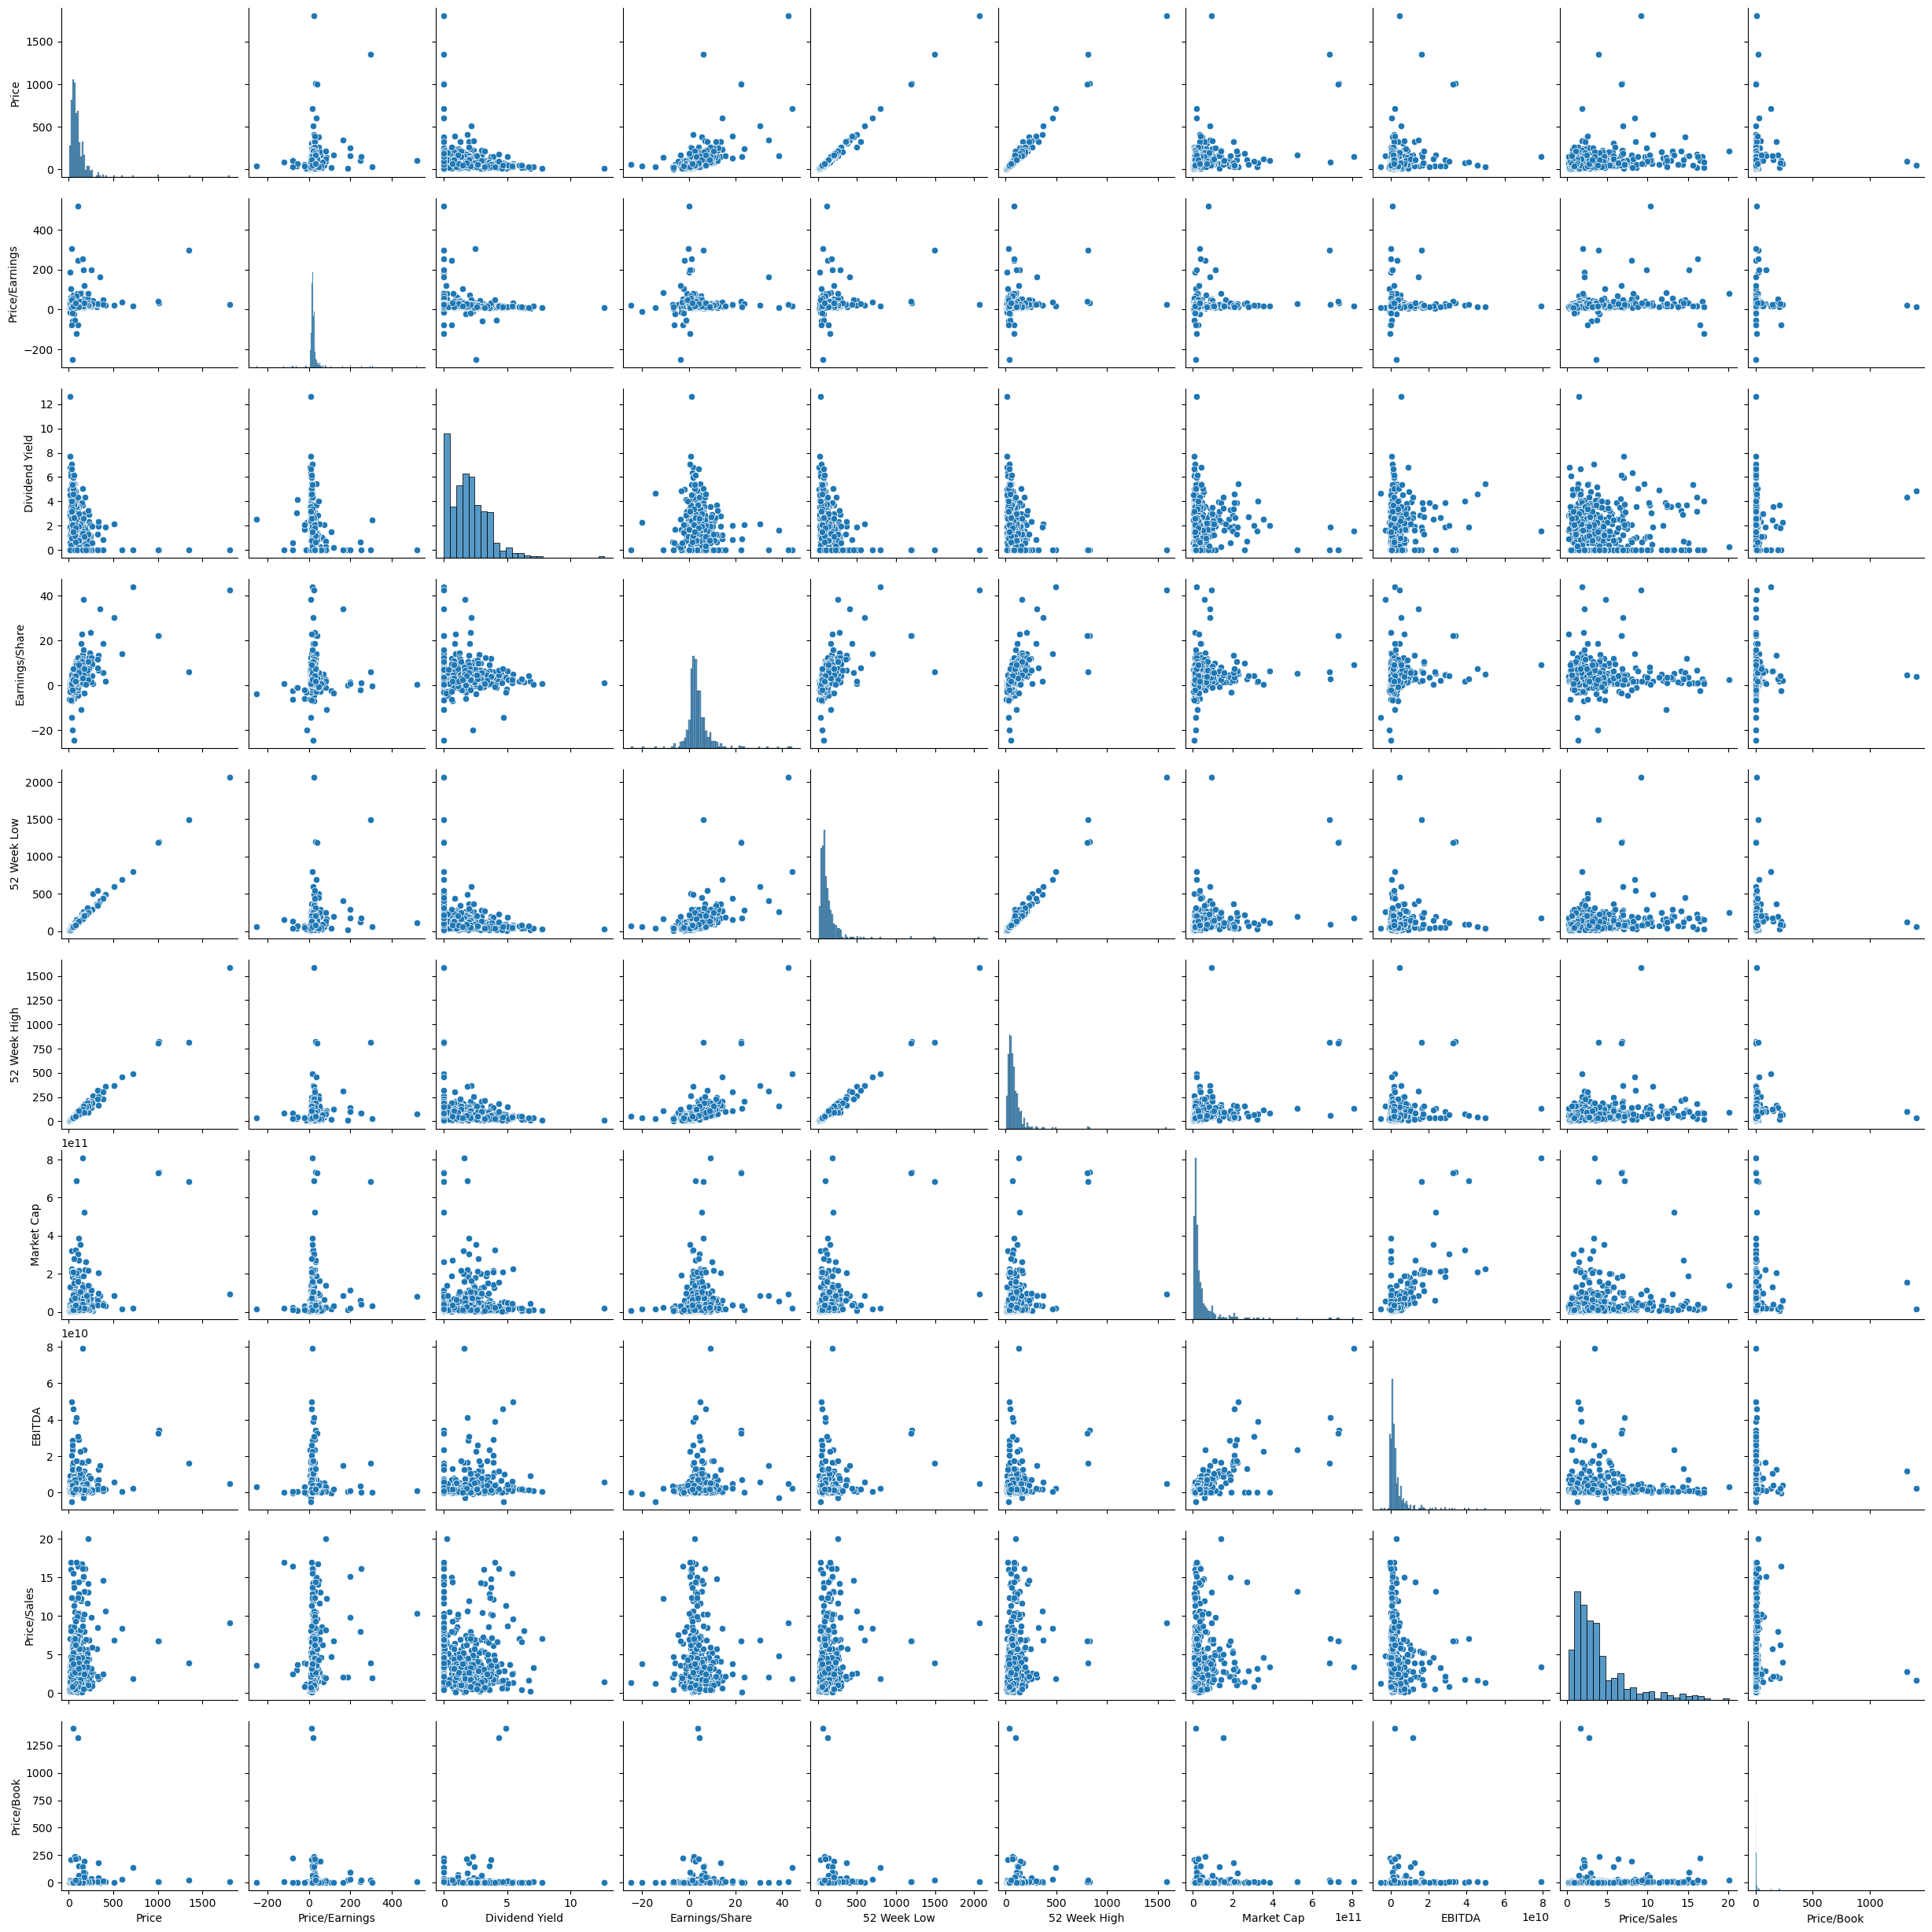

In [84]:
sns.pairplot(df_clean[numeric_columns])
plt.show()

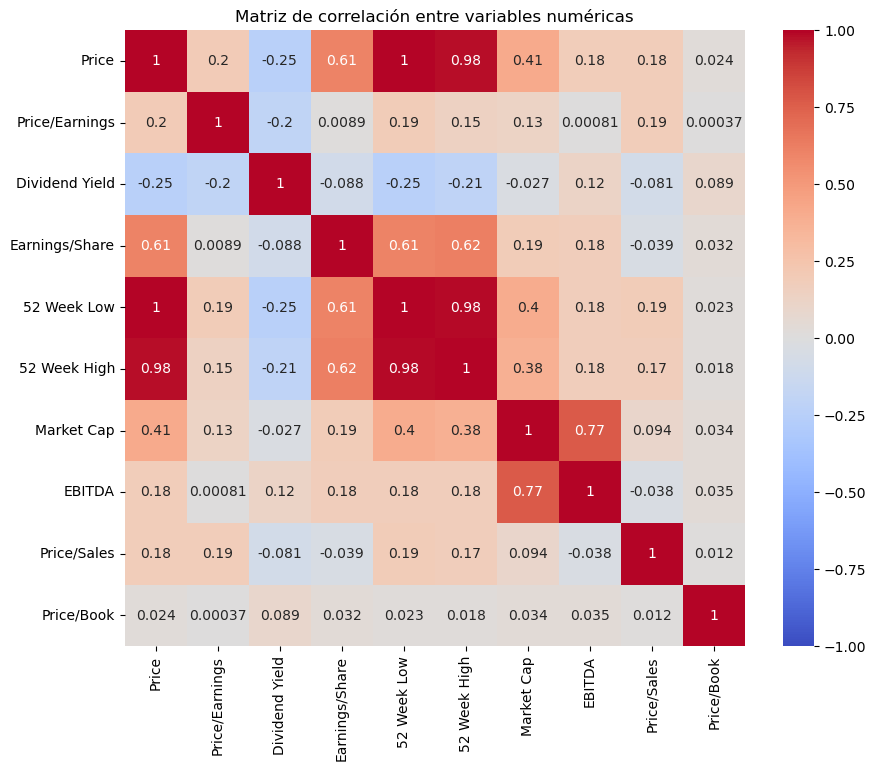

In [85]:
# Matriz de correlación entre variables numéricas
correlation_matrix = df_clean[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

# MODELOS

## 1R MODELO

In [86]:
# Seleccionar características
features = ['Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']
target = 'Price'

X = df_clean[features]
y = df_clean[target]

In [87]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
# Crear el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [89]:
# Definir el grid de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50], 
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Configurar la búsqueda de grid
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error', 'r2': 'r2'}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Ajustar la búsqueda de grid
grid_search.fit(X_train, y_train)

# Mejor modelo encontrado por la búsqueda de grid
best_model = grid_search.best_estimator_

# Hacer predicciones con el mejor modelo
best_predictions = best_model.predict(X_test)

# Calcular el RMSE con el mejor modelo
best_rmse = mean_squared_error(y_test, best_predictions, squared=False)
print(f'Mejor RMSE: {best_rmse}')

# Calcular el R² con el mejor modelo
best_r2 = r2_score(y_test, best_predictions)
print(f'Mejor R²: {best_r2}')

Fitting 3 folds for each of 270 candidates, totalling 810 fits
Mejor RMSE: 37.30211371292344
Mejor R²: 0.9375331048110602


c:\Users\Pavel\miniconda3\envs\ambiente_proyecto\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


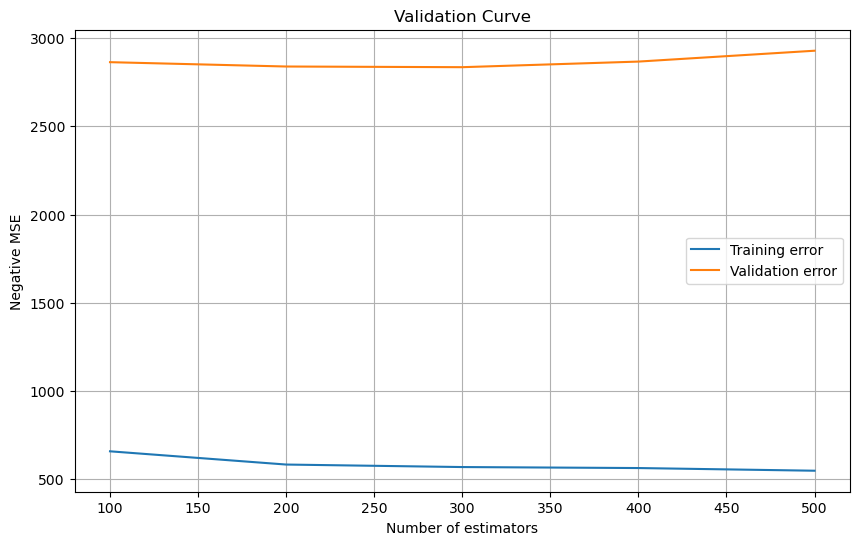

In [90]:
# Curva de validacion
param_range = [100, 200, 300, 400, 500]
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name='n_estimators', param_range=param_range, cv=3,
    scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(param_range, train_scores_mean, label='Training error')
plt.plot(param_range, test_scores_mean, label='Validation error')
plt.xlabel('Number of estimators')
plt.ylabel('Negative MSE')
plt.title('Validation Curve')
plt.legend()
plt.grid(True)
plt.show()

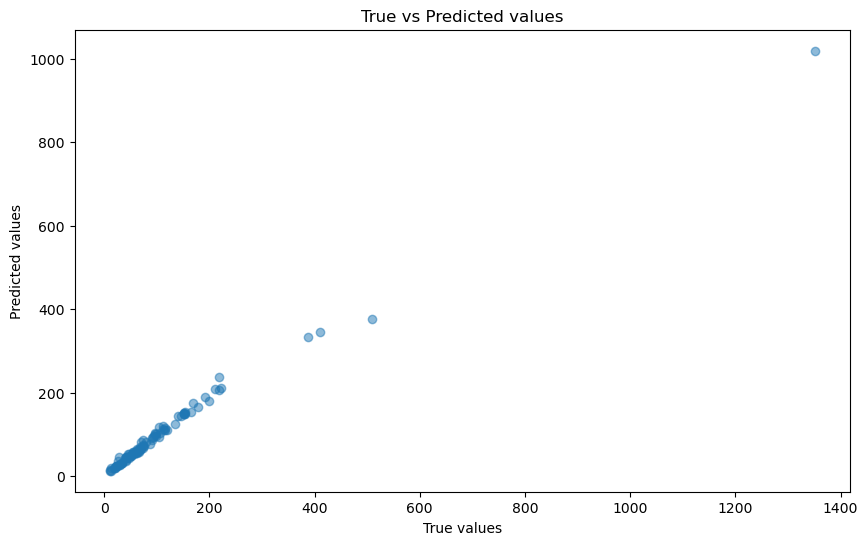

In [91]:
# Grafico de predicciones vs observaciones reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values')
plt.show()

In [92]:
# Calcular el error absoluto
errors = abs(y_test - best_predictions)

# Identificar el índice del mayor error
max_error_index = errors.idxmax()

In [93]:
# Obtener las características del dato atípico
atypical_data = df_clean.loc[max_error_index]

# Imprimir las características del dato atípico
print(atypical_data)

Name                      Amazon.com Inc
Sector            Consumer Discretionary
Price                             1350.5
Price/Earnings                    296.16
Dividend Yield                       0.0
Earnings/Share                      6.16
52 Week Low                       1498.0
52 Week High                       812.5
Market Cap                686000000000.0
EBITDA                     16132000000.0
Price/Sales                     3.927053
Price/Book                         24.28
Name: 30, dtype: object


In [94]:
# Crear nuevas series excluyendo el dato atípico
y_test_cleaned = y_test.drop(index=max_error_index)
best_predictions_cleaned = pd.Series(best_predictions, index=y_test.index).drop(index=max_error_index)

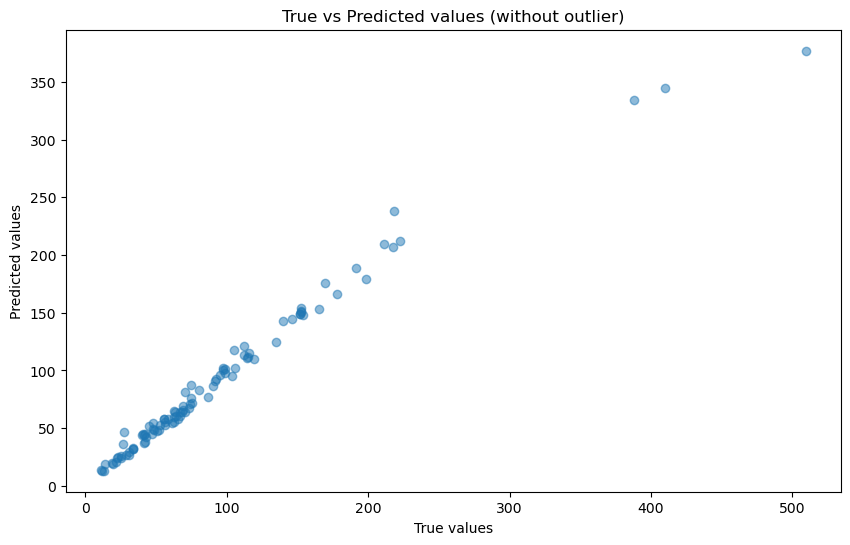

In [95]:
# Gráfico de predicciones vs observaciones reales sin el dato atípico
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cleaned, best_predictions_cleaned, alpha=0.5)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('True vs Predicted values (without outlier)')
plt.show()

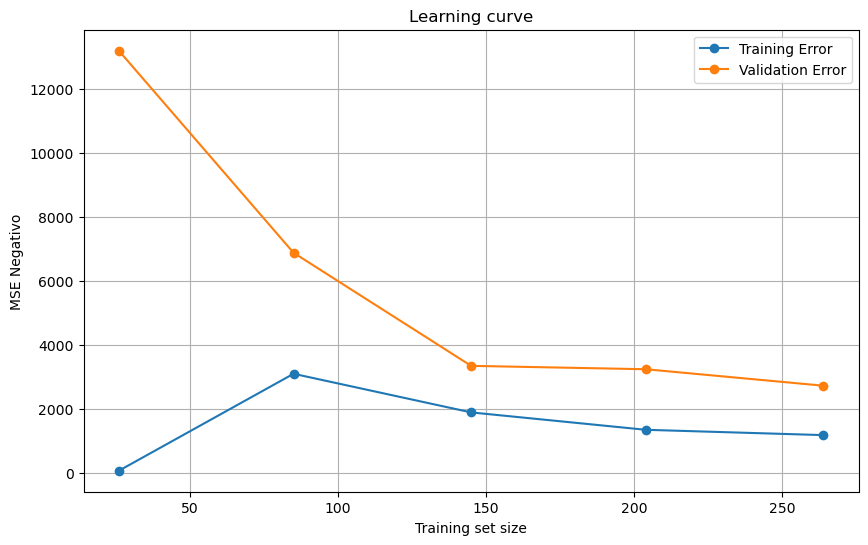

In [96]:
# Curva de aprendizaje

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Validation Error')
plt.xlabel('Training set size')
plt.ylabel('MSE Negativo')
plt.title('Learning curve')
plt.legend()
plt.grid(True)
plt.show()

## 2O MODELO

In [97]:
# Seleccionar características
features = ['Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']
target = 'Price'

X = df_clean[features]
y = df_clean[target]

In [98]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
# Normalizar los datos 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
# Crear el modelo de Regresión Lineal
model = LinearRegression()

In [101]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

LinearRegression()

In [102]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [103]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [104]:
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

#Mostrar los coeficientes y el intercepto del modelo
print('\nCoeficientes del modelo:')
for coef, feature in zip(model.coef_, X.columns):
    print(f'{feature}: {coef:.2f}')
print(f'Intercepto: {model.intercept_:.2f}')

Mean Squared Error (MSE): 317.24
R^2 Score: 0.9858

Coeficientes del modelo:
Price/Earnings: 1.43
Dividend Yield: -1.66
Earnings/Share: 2.96
52 Week Low: 89.92
52 Week High: 38.17
Market Cap: 2.14
EBITDA: -1.03
Price/Sales: -0.10
Price/Book: 0.51
Intercepto: 103.84


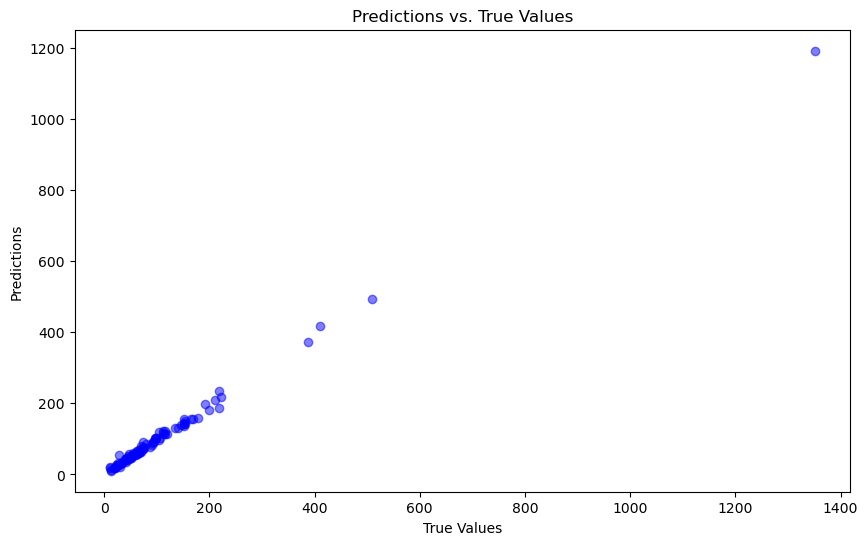

In [105]:
# Prediccion vs Valores Reales

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs. True Values')
plt.show()

In [106]:
# Calcular el error absoluto
errors_2 = abs(y_test - best_predictions)

# Identificar el índice del mayor error
max_error_index_2  = errors.idxmax()

In [107]:
# Obtener las características del dato atípico
atypical_data_2 = df_clean.loc[max_error_index_2]

# Imprimir las características del dato atípico
print(atypical_data_2)

Name                      Amazon.com Inc
Sector            Consumer Discretionary
Price                             1350.5
Price/Earnings                    296.16
Dividend Yield                       0.0
Earnings/Share                      6.16
52 Week Low                       1498.0
52 Week High                       812.5
Market Cap                686000000000.0
EBITDA                     16132000000.0
Price/Sales                     3.927053
Price/Book                         24.28
Name: 30, dtype: object


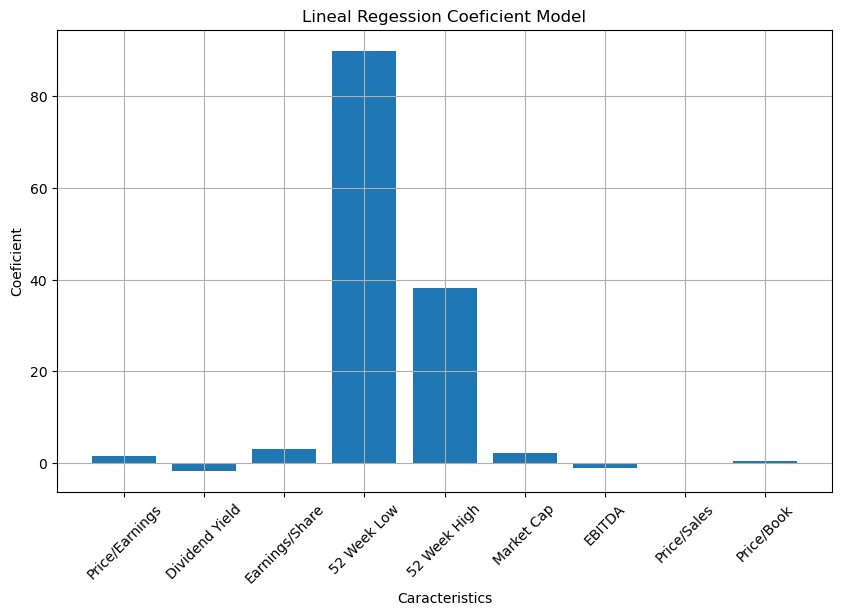

In [40]:
# Diagrama de coeficiente del modelo

plt.figure(figsize=(10, 6))
plt.bar(X.columns, model.coef_)
plt.xlabel('Caracteristics')
plt.ylabel('Coeficient')
plt.title('Lineal Regession Coeficient Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

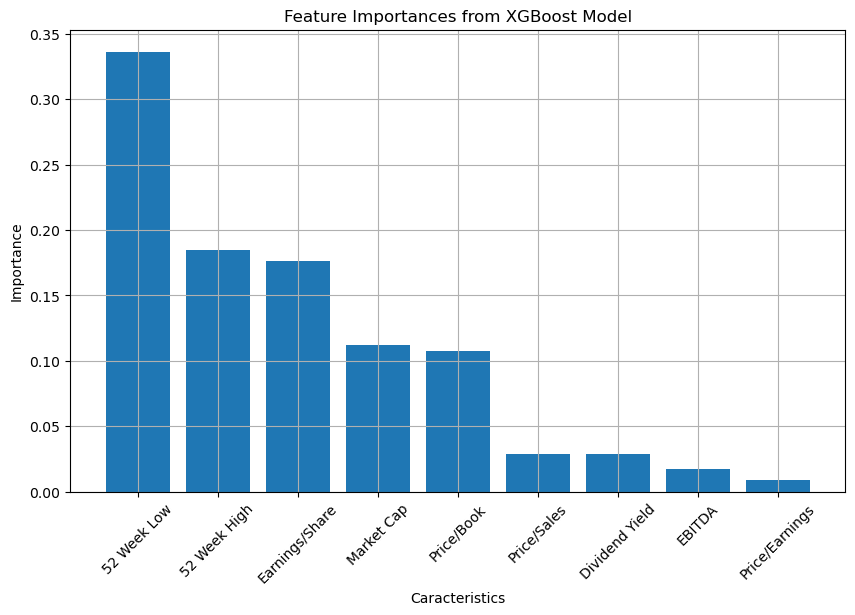

In [126]:
# Obtener las importancias de las características
feature_importances = model.feature_importances_

# Crear un DataFrame con las características y sus importancias
importance_df = pd.DataFrame({
    'Caracteristics': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por las importancias de forma descendente
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Graficar las importancias ordenadas
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Caracteristics'], importance_df['Importance'])
plt.xlabel('Caracteristics')
plt.ylabel('Importance')
plt.title('Feature Importances from XGBoost Model')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## concatenarlos y ordenadarnos de forma descendiente

## 3R MODELO

In [108]:
# Seleccionar características
features = ['Price/Earnings', 'Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']
target = 'Price'

X = df_clean[features]
y = df_clean[target]

In [109]:
# Dividir los datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
# Normalizar los datos (XGBoost no requiere normalización, pero puede ser útil)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [111]:
# Crear el modelo de XGBoost para regresión
model = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

In [112]:
# Entrenar el modelo
model.fit(X_train_scaled, y_train)

XGBRegressor(alpha=10, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [113]:
# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

In [114]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R^2 Score: {r2:.4f}')

Mean Squared Error (MSE): 6339.63
R^2 Score: 0.7154


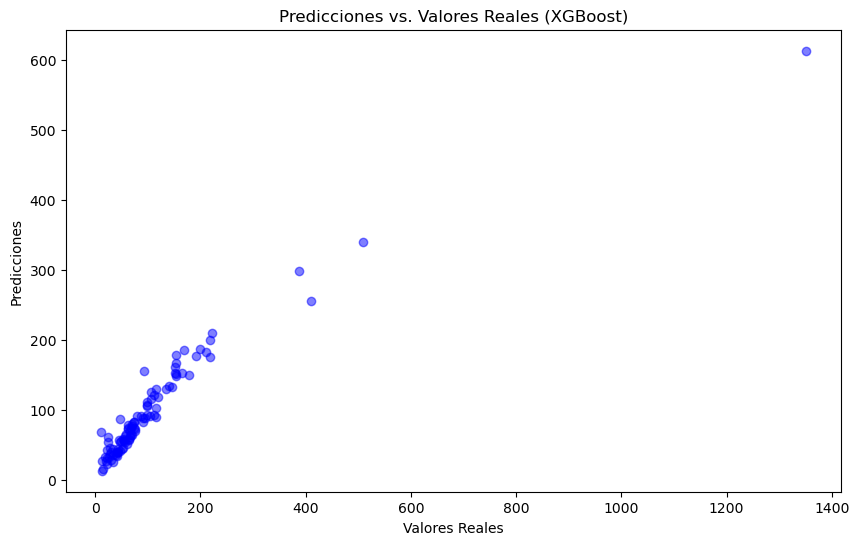

In [115]:
# Gráfico de Dispersión de Predicciones vs. Valores Reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones vs. Valores Reales (XGBoost)')
plt.show()

In [116]:
# Calcular el error absoluto
errors_3 = abs(y_test - best_predictions)

# Identificar el índice del mayor error
max_error_index_3  = errors.idxmax()

In [117]:
# Crear nuevas series excluyendo el dato atípico
y_test_cleaned_3 = y_test.drop(index=max_error_index)
best_predictions_cleaned_3 = pd.Series(best_predictions, index=y_test.index).drop(index=max_error_index_3)

In [118]:
# Obtener las características del dato atípico
atypical_data_3 = df_clean.loc[max_error_index_3]

# Imprimir las características del dato atípico
print(atypical_data_3)

Name                      Amazon.com Inc
Sector            Consumer Discretionary
Price                             1350.5
Price/Earnings                    296.16
Dividend Yield                       0.0
Earnings/Share                      6.16
52 Week Low                       1498.0
52 Week High                       812.5
Market Cap                686000000000.0
EBITDA                     16132000000.0
Price/Sales                     3.927053
Price/Book                         24.28
Name: 30, dtype: object


In [119]:
amazon = df_clean[df_clean['Name'] == 'Amazon.com Inc']
print(amazon)

              Name                  Sector   Price  Price/Earnings  \
30  Amazon.com Inc  Consumer Discretionary  1350.5          296.16   

    Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
30             0.0            6.16       1498.0         812.5  6.860000e+11   

          EBITDA  Price/Sales  Price/Book  
30  1.613200e+10     3.927053       24.28  


IndexError: boolean index did not match indexed array along dimension 0; dimension is 505 but corresponding boolean dimension is 495

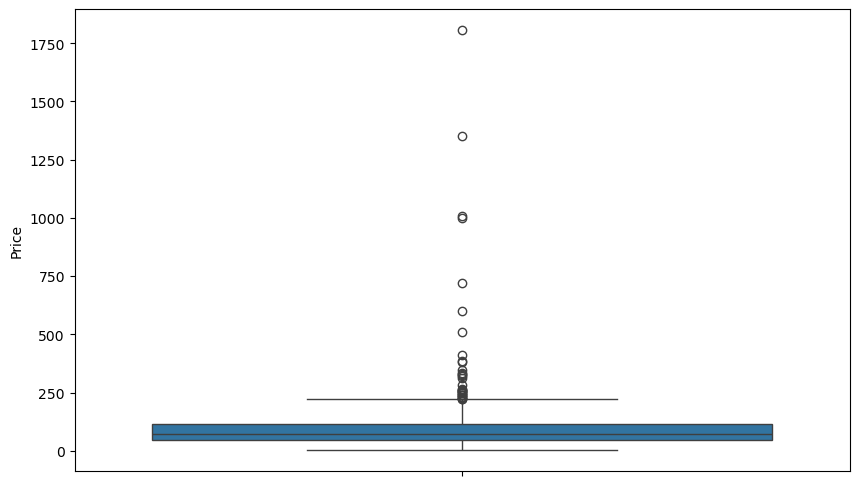

In [120]:
# Variables a analizar
variables = ['Price', 'Price/Earnings', 'Dividend Yield', 'Earnings/Share', 'Market Cap', 'EBITDA', 'Price/Sales', 'Price/Book']

# Graficar cada variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[variable])
    plt.scatter(df.index[df_clean['Name'] == 'Amazon.com Inc'], amazon[variable], color='red')
    plt.title(f'Boxplot de {variable} con Amazon.com Inc destacado')
    plt.show()

In [121]:
# Filtrar empresas de tecnología
tech_companies = df_clean[df_clean['Sector'] == 'Information Technology']

# Calcular estadísticas descriptivas
amazon_stats = amazon.describe()
tech_stats = tech_companies.describe()

# Comparar métricas clave
print(f"Amazon Metrics:\n{amazon_stats}")
print(f"Technology Sector Metrics:\n{tech_stats}")

Amazon Metrics:
        Price  Price/Earnings  Dividend Yield  Earnings/Share  52 Week Low  \
count     1.0            1.00             1.0            1.00          1.0   
mean   1350.5          296.16             0.0            6.16       1498.0   
std       NaN             NaN             NaN             NaN          NaN   
min    1350.5          296.16             0.0            6.16       1498.0   
25%    1350.5          296.16             0.0            6.16       1498.0   
50%    1350.5          296.16             0.0            6.16       1498.0   
75%    1350.5          296.16             0.0            6.16       1498.0   
max    1350.5          296.16             0.0            6.16       1498.0   

       52 Week High    Market Cap        EBITDA  Price/Sales  Price/Book  
count           1.0  1.000000e+00  1.000000e+00     1.000000        1.00  
mean          812.5  6.860000e+11  1.613200e+10     3.927053       24.28  
std             NaN           NaN           NaN         

In [122]:
# Ordenar el DataFrame por la columna 'Price' en orden descendente
df_clean_sorted = df_clean.sort_values(by='Price', ascending=False)

# Seleccionar las 5 primeras filas
top_5_companies = df_clean_sorted.head(5)

# Mostrar las 5 empresas con mejor precio de cierre
print(top_5_companies[['Name', 'Price']])

                     Name    Price
372     Priceline.com Inc  1806.06
30         Amazon.com Inc  1350.50
27   Alphabet Inc Class A  1007.71
28   Alphabet Inc Class C  1001.52
61           AutoZone Inc   718.57


In [123]:
df_clean.to_csv('continuacion_proyecto.csv')